# Matplotlib

Dataset df1: Gapminder

In [101]:
import pandas as pd 
path = 'C:\\Users\\lpuentes\\Documents\\Lina\\DataCamp\\Datasets\\'
df1 = pd.read_csv(path+'Intermediate - Gapminder.csv')


In [63]:
country = df1['country'].to_list()
year = df1['year'].to_list()
pop = df1['population'].to_list()
cont = df1['cont'].to_list()
life_exp = df1['life_exp'].to_list()
gdp_cap = df1['gdp_cap'].to_list()

<b> GRÁFICAS BÁSICAS CON MATPLOTLIB </b>

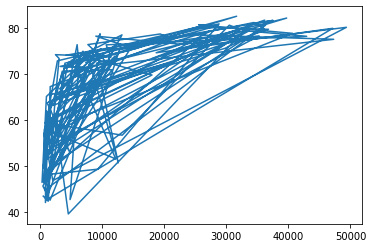

In [14]:
import matplotlib.pyplot as plt 

# Grafico gdp_cap (eje x) vs life_exp (eje y)
plt.plot(gdp_cap,life_exp)
plt.show()

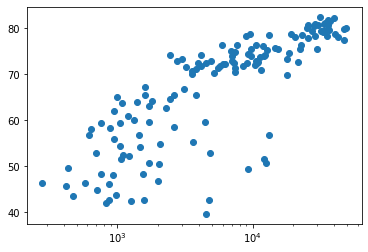

In [24]:
# Como lo de arriba no se entiende nada, para saber cómo se distribuyen mis datos lo veré en un diagrama de dispersión 

plt.scatter(gdp_cap,life_exp)
plt.xscale('log') #El eje x lo veo en scala logaritmica
plt.show()

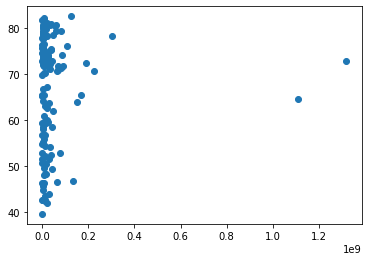

In [20]:
# Ahora, ¿hay alguna relación entre la población (pop) y la esperanza de vida (life_exp)?

plt.scatter(pop,life_exp)
plt.show()

#Se puede ver que no existe una relación entre estas dos variables.

<b> HISTOGRAMAS </b>

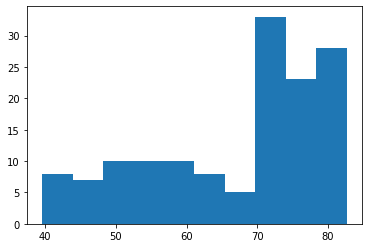

In [5]:
# Se crea un histograma para ver la distribución de la esperanza de vida sin especificar el argumento "bin"
import matplotlib.pyplot as plt 

plt.hist(life_exp)
plt.show()

# Se puede ver cómo por defecto el número de bins es 10

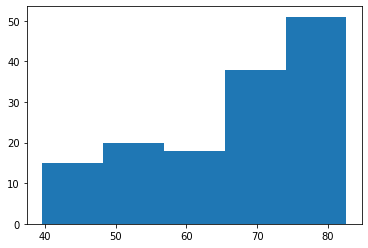

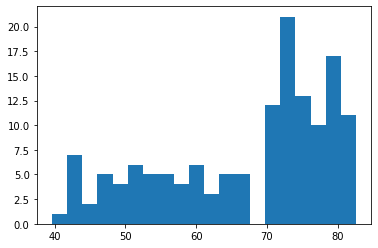

<Figure size 432x288 with 0 Axes>

In [11]:
# Usando el argumento "bins" puedo variar el número de bins usados en el histograma. 
#Recordar que: pocos bins simplificarán demasiado la realidad y no mostrará los detalles, muchos complicarán la realidad. 

plt.hist(life_exp,bins=5)
plt.show()
plt.clf() #----> Permite limpiar la gráfica para empezar otra de nuevo (o algo así)
plt.hist(life_exp,bins=20)
plt.show()
plt.clf()

<b> PERSONALIZACIÓN </b>

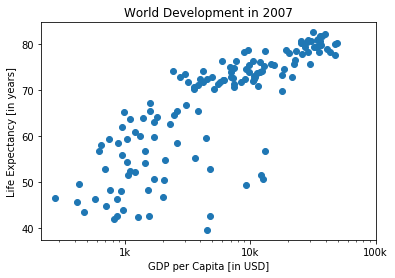

In [16]:
# De diagrama de dispersión de gdp_cap vs life_exp

plt.scatter(gdp_cap,life_exp)
plt.xscale('log')

plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2007')

tick_val = [1000, 10000, 100000]
tick_lab = ['1k', '10k', '100k']
plt.xticks(tick_val,tick_lab)

plt.show()

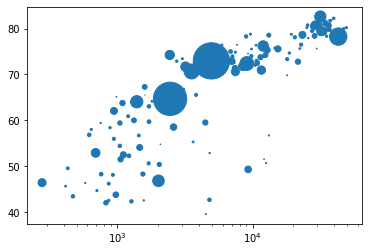

In [28]:
# Ahora, ¿qué tal si veo el tamaño de los puntos en relación a su población? Usando el argumento 's' (size) de scatter. 

import numpy as np
pop_mill = np.array(pop)/1000000 # Debido a que los valores eran muy grandes, lo paso a x10^6 para que se pueda visualizar

plt.scatter(gdp_cap, life_exp, s = pop_mill)
plt.xscale('log')
plt.show()

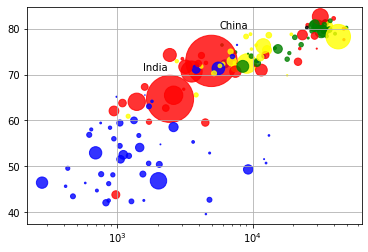

In [94]:
# Agregar colores por continente. Para agregar color a las gráficas uso el argumento 'c'.

colores = {
    'Asia':'red',
    'Europe':'green',
    'Africa':'blue',
    'Americas':'yellow',
    'Oceania':'black'
}
col =[]
for i in cont: 
    col.append(colores.get(i))
    
# El argumento 'alpha' permite cambiar la opacidad del color del gráfico. Va de 0 (transparente) a 1 (no transparente)
plt.scatter(gdp_cap,life_exp, s = pop_mill*2, c = col , alpha = 0.8) 
plt.xscale('log')

# Additional customizations
plt.text(1550, 71, 'India')
plt.text(5700, 80, 'China')

# Add grid() call
plt.grid(True)

plt.show()



# Diccionarios y Pandas

<b> Diccionarios 

In [96]:
europe = {'spain':'madrid', 'france':'paris', 'germany':'bonn',
          'norway':'oslo', 'australia':'vienna'} 

#Añadir italy a europe 
europe['italy'] = 'rome' #Ya que 'italy' no existe en el diccionario entonces se agrega, si ya existiera el valor se actualiza

#Actualizar el valor de 'germany'
europe['germany'] = 'berlin'

#Eliminar 'australia' ya que no pertenece a europa
del(europe['australia'])

print(europe)

{'spain': 'madrid', 'france': 'paris', 'germany': 'berlin', 'norway': 'oslo', 'italy': 'rome'}


<b> Pandas </b> <br>
Crear DataFrame a partir de un diccionario

In [97]:
names = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt']
dr =  [True, False, False, False, True, True, True]
cpc = [809, 731, 588, 18, 200, 70, 45]

import pandas as pd 

cars_dict = {'country':names,'drives_right':dr,'cars_per_cap':cpc}
cars = pd.DataFrame(cars_dict)

cars

,country,drives_right,cars_per_cap
0,United States,True,809
1,Australia,False,731
2,Japan,False,588
3,India,False,18
4,Russia,True,200
5,Morocco,True,70
6,Egypt,True,45


In [98]:
#Para cambiar los indices mostrados del 0 al 6, puedo usar 'index' así: 
row_labels = ['US', 'AUS', 'JPN', 'IN', 'RU', 'MOR', 'EG']
cars.index = row_labels
cars

,country,drives_right,cars_per_cap
US,United States,True,809
AUS,Australia,False,731
JPN,Japan,False,588
IN,India,False,18
RU,Russia,True,200
MOR,Morocco,True,70
EG,Egypt,True,45


<b>Pandas</b><br>
Crear DataFrama desde un archivo csv

In [106]:
cars = pd.read_csv(path+'Intermediate - cars.csv')
cars

,Unnamed: 0,cars_per_cap,country,drives_right
0,US,809,United States,True
1,AUS,731,Australia,False
2,JAP,588,Japan,False
3,IN,18,India,False
4,RU,200,Russia,True
5,MOR,70,Morocco,True
6,EG,45,Egypt,True


In [111]:
#Ya que el resultado del dataframe de cars desde el archivo csv no se ve como se desea, entonces se incluye el argumento 
# 'index_col' para que la primera columna sea el índice.

cars = pd.read_csv(path+'Intermediate - cars.csv', index_col=0)
cars

,cars_per_cap,country,drives_right
US,809,United States,True
AUS,731,Australia,False
JAP,588,Japan,False
IN,18,India,False
RU,200,Russia,True
MOR,70,Morocco,True
EG,45,Egypt,True


In [112]:
#Acceso a filas y columnas con []

print(cars['country']) #Objeto tipo Pandas Series. Devuelve todas las filas para la columna 'country'
print(cars[['country']]) #Objeto tipo Pandas DataFrame. Devuelve todas las filas para la columna 'country'

print(cars[1:3]) #Objeto tipo Pandas DataFrame. Devuelve toda la información para las filas 1 y 2

US     United States
AUS        Australia
JAP            Japan
IN             India
RU            Russia
MOR          Morocco
EG             Egypt
Name: country, dtype: object
           country
US   United States
AUS      Australia
JAP          Japan
IN           India
RU          Russia
MOR        Morocco
EG           Egypt
     cars_per_cap    country  drives_right
AUS           731  Australia         False
JAP           588      Japan         False


In [122]:
# Acceso a filas y columnas con 'loc' e 'iloc'

print(cars.loc['IN']) #Objeto tipo Pandas Series. 
print(cars.iloc[3])   #Objeto tipo Pandas Series. (Mismo resultado de arriba)

print('\n')

print(cars.loc[['US','IN']]) #Objeto tipo Pandas DataFrame. 
print(cars.iloc[[0,3]])      #Objeto tipo Pandas DataFrame. (Mismo resultado de arriba)

print('\n')

print(cars.loc['MOR','drives_right']) #Trae el valor de 'drives_right' para esa fila (ciudad MOR)
print(cars.loc[['RU','MOR'],['country','drives_right']]) #Devuelve el df con las columnas para esas filas 

print('\n')

print(cars.loc[:,'drives_right']) #Devuelve la columna como objeto Series
print(cars.loc[:,['drives_right']]) #Devuelve la columna como objeto DataFrame

cars_per_cap       18
country         India
drives_right    False
Name: IN, dtype: object
cars_per_cap       18
country         India
drives_right    False
Name: IN, dtype: object


    cars_per_cap        country  drives_right
US           809  United States          True
IN            18          India         False
    cars_per_cap        country  drives_right
US           809  United States          True
IN            18          India         False


True
     country  drives_right
RU    Russia          True
MOR  Morocco          True


US      True
AUS    False
JAP    False
IN     False
RU      True
MOR     True
EG      True
Name: drives_right, dtype: bool
     drives_right
US           True
AUS         False
JAP         False
IN          False
RU           True
MOR          True
EG           True
